### Importing Libraries

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

### Displaying Videos & Saving a Single Frame

In [2]:
cap = cv2.VideoCapture('/Users/comp/video.mp4')
while cap.isOpened():
    ret, image = cap.read()

    if not ret:
        break

    cv2.imshow("Video", image)
    cv2.imwrite('pic.png', image)
    cv2.waitKey(10) & 0xFF==ord('q')

cv2.destroyAllWindows()
cap.release()

### Thresholding Technique For Contour Detection

In [3]:
# Reading an Image
img_colour = cv2.imread("pic.png",1)
img_grayscale = cv2.imread("pic.png",0)

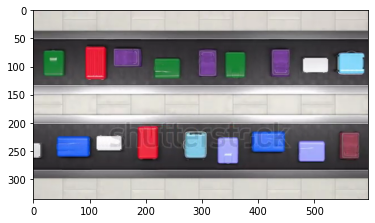

In [4]:
plt.imshow(cv2.cvtColor(img_colour, cv2.COLOR_BGR2RGB))
# plt.axis("off")
plt.show()

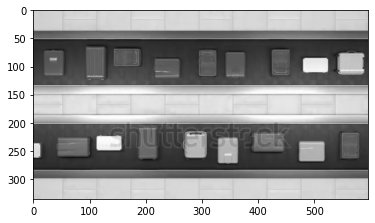

In [5]:
plt.imshow(cv2.cvtColor(img_grayscale, cv2.COLOR_BGR2RGB))
# plt.axis("off")
plt.show()

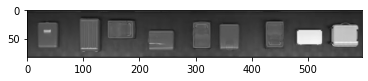

In [6]:
# Cropping Image to Belt Area
new_image = img_grayscale[50:133]
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# plt.axis("off")
plt.show()

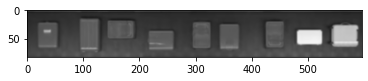

In [7]:
# Applying Gaussian Blur
blur = cv2.GaussianBlur(new_image,(5,5),0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
# plt.axis("off")
plt.show()

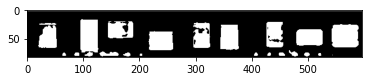

In [8]:
# Applying threshold
_ , thresholded_image = cv2.threshold(blur, 85, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thresholded_image, cv2.COLOR_BGR2RGB))
# plt.axis("off")
plt.show()

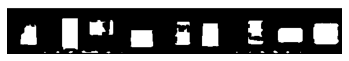

In [9]:
# Make a 2*2 kernel of ones
kernel = np.ones((2,2),np.uint8)

# Apply erotion with an iteration of 3
eroded_image = cv2.erode(thresholded_image, kernel,iterations = 3)

# Display Eroded image
plt.imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

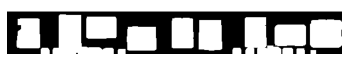

In [10]:
# Make a 4*4 kernel of ones
kernel = np.ones((4,4),np.uint8)

# Apply dilation with an iteration of 3
dilated_image = cv2.dilate(thresholded_image, kernel,iterations = 3)

# Display Dilated image
plt.imshow(cv2.cvtColor(dilated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

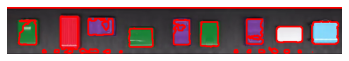

In [11]:
# Finding & Drawing Contours
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


cv2.drawContours(img_colour[50:133] , contours, -1 , (0,0,255), 2)

plt.imshow(cv2.cvtColor(img_colour[50:133], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [12]:
len(contours)

22

#### Edge Technique For Contour Detection

In [13]:
# Reading an Image
img_colour = cv2.imread("pic.png",1) 
img_grayscale = cv2.imread("pic.png",0)

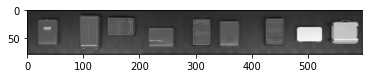

In [14]:
new_image = img_grayscale[55:133]
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# plt.axis("off")
plt.show()

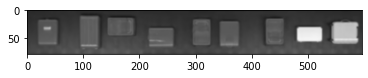

In [15]:
blur = cv2.GaussianBlur(new_image,(5,5),0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
# plt.axis("off")
plt.show()

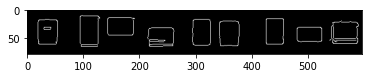

In [16]:
# Edge Detection
edges = cv2.Canny(blur, 30, 120)

# Display Edges in the image
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
# plt.axis("off")
plt.show()

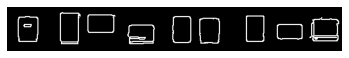

In [17]:
# Make a 7x7 kernel of ones
kernel = np.ones((2,2),np.uint8)

# Apply dilation with an iteration of 3
dilated_image_e = cv2.dilate(edges, kernel,iterations = 1)

# Display Dilated image
plt.imshow(cv2.cvtColor(dilated_image_e, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

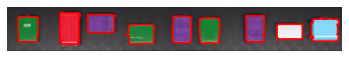

In [18]:
contours_e, _ = cv2.findContours(dilated_image_e, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


cv2.drawContours(img_colour[55:133] , contours_e, -1 , (0,0,255), 2)

plt.imshow(cv2.cvtColor(img_colour[55:133], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [19]:
len(contours_e)

9

### Applying The Right Technique On Video

In [ ]:
cap = cv2.VideoCapture('/Users/comp/video.mp4')

while True:
    _, frame = cap.read()

    # Belt
    belt = frame[55:133]
    gray_belt = cv2.cvtColor(belt, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray_belt,(5,5),0)
    edges = cv2.Canny(blur, 30, 120)
    kernel = np.ones((2,2),np.uint8)
    dilated_image = cv2.dilate(edges, kernel,iterations = 1)

    # Detect the Bags
    contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        (x, y, w, h) = cv2.boundingRect(cnt)
        # Calculate area
        area = int(cv2.contourArea(cnt)/100)
        # Distinguish small and big bags
        if area > 15:
            # Big Bag
            cv2.rectangle(frame, (x, y+55), (x + w, y + h+55), (0, 0, 255), 3)
        elif area< 15:
            # Small Bag
            cv2.rectangle(frame, (x, y+55), (x + w, y + h+55), (255, 0, 0), 3)

        cv2.putText(frame, str(area), (x+5, y+55), 1, 1, (0, 255, 0))

    cv2.putText(frame, "Total Bags In Frame = "+str(len(contours)), (25, 25), 1, 1, (0, 0, 0))
    cv2.imshow("Frame", frame)
    cv2.waitKey(10) & 0xFF==ord('q')
cap.release()
cv2.destroyAllWindows()